$\textbf{Policy Iteration implemented for the reset application}$

The pseudo-code for Policy Iteration can be found in Algorithm 2.

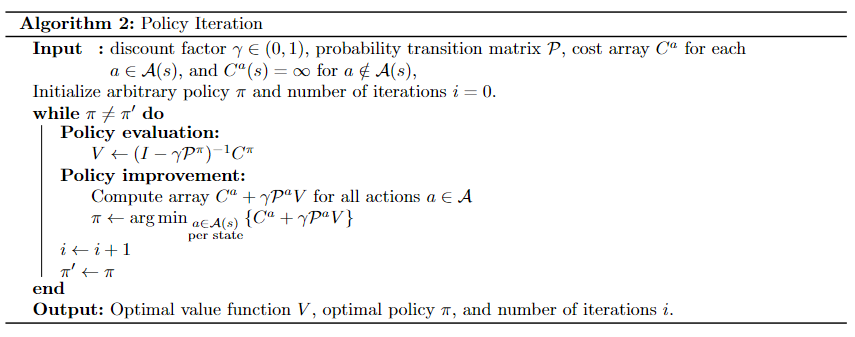

The implementation of this algorithm can be found in the code below.

In [1]:


import numpy as np
import time


# policy evaluation
def Policy_Evaluation_2_actions(gamma,P,C_0,C_1,pi_s):
    N=np.size(P,1)-1
    
    P_pi=P.copy()
    
    # nonzeros(pi_s) returns the index of the nonzero elements, i.e. action=1
    # in the rows corresponding to this index we change the P
    # so that we will reset to state 0 w.p. 1
    P_pi[np.nonzero(pi_s)]=np.identity(N+1)[0]
    
    C=C_0.copy()
    C[np.nonzero(pi_s)]=C_1[np.nonzero(pi_s)]
    
    # x=linalg.solve(a,b) solves ax=b
    # in our case we solve (I-gamma*P)V=C
    Vn = np.linalg.solve(np.identity(N+1)-gamma*P_pi,C)
    
    return Vn


# policy improvement step
def Policy_Improvement_2_actions(gamma,P,C_0,C_1,pi_s,Vn):  
    # initializing N and several value functions
    N=np.size(P,1)-1
    Vn_0=np.zeros(N+1)
    Vn_1=np.zeros(N+1)
    
    # value function if action=0 was chosen for all states
    Vn_0=C_0+gamma*P@Vn 
    # value function if action=1 was chosen for all states
    Vn_1=C_1+gamma*np.repeat(Vn[0],N+1) 
    
    
    # finding the action that minimizes the value function for each state
    # here, axis=0 looks for row (=action) for which the value in the column (=state) is minimized
    policy=np.argmin(np.array([Vn_0,Vn_1]),axis=0)
    
    return policy 





Initializing the algorithm's parameters:

In [2]:
# discount factor
gamma=0.3

# nr of episodes
nrepisodes = 2000

# number of states - 1
N=3


Initializing the probability transition matrix (choose one of the three):

In [ ]:
# P_A
P = np.diag(np.ones(N),1)
P[N,0]=1


In [3]:
# P_B
P = np.diag(1/2*np.ones(N),1)+np.diag(1/2*np.ones(N),-1)
P[-1,-2]=1
P[0,1]=1


In [ ]:
# P_C
P = 1/4*np.ones([N+1,N+1])


Initializing the cost realization (choose one of the three):

In [4]:
# Realization 1

# Cost for action = 0
C_0=np.zeros(N+1)

# Cost for action = 1
C_1=np.arange(N+1,dtype=float)
C_1[N]=2*N


In [ ]:
# Realization 2

# Cost for action = 0
C_0=np.arange(N+1,dtype=float)+1 

# Cost for action = 1
K=2
C_1=K*C_0


In [ ]:
# Realization 3

# Cost for action = 0
C_0=1/np.arange(N+1,0,-1,dtype=float)

# Cost for action = 1
C_1=10**np.arange(N+1,dtype=float)


Running the Value Iteration algorithm.

In [5]:


# Putting the cost for "illegal actions" to infinity
C_0[N]=float("inf")
C_1[0]=float("inf")


# Initializing the value function
V=np.zeros(N+1)

# Initializing the policy
pi_s = np.ones(N+1,dtype=int)
pi_s[0]=0

# Number of iterations counter
it=0

## Policy Iteration
while True:
    # Policy evaluation for policy pi_s
    V=Policy_Evaluation_2_actions(gamma,P,C_0,C_1,pi_s)
    
    # Policy improvement of policy pi_s
    policy = Policy_Improvement_2_actions(gamma,P,C_0,C_1,pi_s,V)
    
    # Incrementing the number of iterations by 1
    it+=1
    
    # Checking if the policy has changed
    if all(pi_s==policy):
        break
    
    # Assigning the improved policy to pi_s
    pi_s=policy.copy()




$\textit{Example}:$ cost realization 1 with transition matrix $\mathcal{P}_B$ for $\gamma=0.3$ and $N=3$.

In [6]:


print("Optimal policy: \n",policy)
print("Optimal value: \n",V)

Optimal policy: 
 [0 0 0 1]
Optimal value: 
 [0.04352616 0.14508719 0.92372176 6.01305785]
